# This notebook serves as a demo of how to get the CO2 scattering intensity assuming a unifrom sample

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import ScalarFormatter, NullFormatter

plt.rcParams.update({'font.size': 14})
matplotlib.rcParams['xtick.minor.size'] = 0
matplotlib.rcParams['xtick.minor.width'] = 0

import sys
sys.path.append("..")

from ContrastEstimation import util, IntensityEstimation

## Define the sample molecule

In [8]:
my_molecule = util.get_molecule_from_pdb("../pdb_files/trioxane.pdb")

# Show the source code of how I have defined a molecule for calculation.
util.show_formated_molecule_structure(my_molecule)

[
[ 'C', np.array([2.667,1.54,0.0]),],
[ 'C', np.array([0.0,1.54,0.0]),],
[ 'C', np.array([1.334,-0.77,0.0]),],
[ 'O', np.array([1.334,2.31,0.0]),],
[ 'O', np.array([2.667,-0.0,0.0]),],
[ 'O', np.array([0.0,0.0,0.0]),],
],


## Estimate the scattering intensity

In [9]:
density_g_cm3_list = [0.135,]  # g / cm3  # Partial density for each kind of molecule
q_in_A = 2.0 # A

# Define sample thickness
N_sample = 1000
sample_thickness_list = np.linspace(10, 1e4, N_sample) * 1e-6

# Define detector distance
N_det = 1000
distance_list = np.linspace(1, 10, N_det)

# Define detector pixel size
pixel_size = 50e-6  # 50 um

# Define the incident photon count
incident_photon_count = 1e8
incident_photon_energy_keV = 9.5 # keV

# Scattering intensity map
photon_count_per_pixel = IntensityEstimation.get_scatter_intensity_with_a_unifrom_sample_batch(
    molecule_structure_list=[my_molecule, ],
    density_g_cm3_list=density_g_cm3_list,
    sample_thickness_list=sample_thickness_list,
    pixel_size=pixel_size,
    detector_distance_list = distance_list,
    incident_photon_count = incident_photon_count,
    q_detector = q_in_A,
    photon_energy_keV = incident_photon_energy_keV)
        

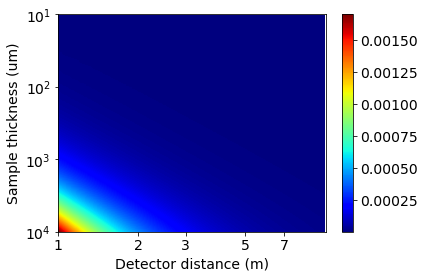

In [10]:
fig, axis = plt.subplots(ncols=1, nrows=1)

img1 = axis.imshow(np.flipud(photon_count_per_pixel),
           extent=[1, 10, 1e4, 10],
           origin="lower",
           aspect='auto',
           cmap='jet')
axis.set_xlabel("Detector distance (m)")
axis.set_ylabel("Sample thickness (um)")

axis.set_yscale('log')

axis.set_xscale('log')
axis.set_xticks([1,2,3,5,7])
axis.xaxis.set_major_formatter(ScalarFormatter())
axis.minorticks_off()


fig.colorbar(img1, ax=axis)

plt.show()